Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [3]:
%matplotlib inline

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

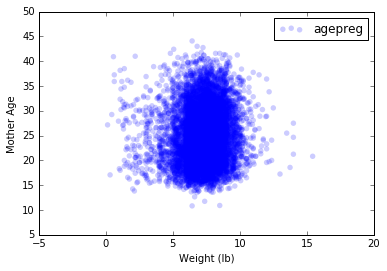

Pearson's correlation:  0.0688339703541
Spearman's rank:  0.0946100410966


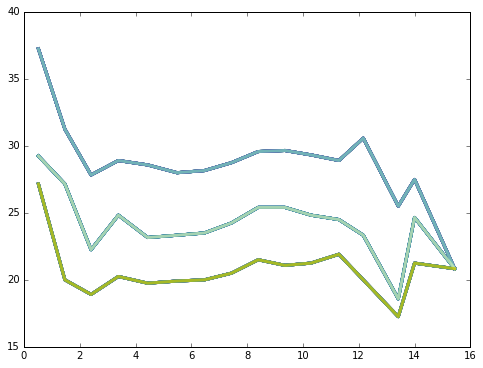

In [14]:
import nsfg
import thinkplot
import numpy as np
import thinkstats2

df = nsfg.ReadFemPreg()
thinkplot.Scatter(df.totalwgt_lb, df.agepreg)
thinkplot.Show(xlabel='Weight (lb)',
               ylabel='Mother Age',
               alpha=0.2)

df = df.dropna(subset=['totalwgt_lb','agepreg'])
bins = np.arange(0,20,1)
indices = np.digitize(df.totalwgt_lb,bins)
groups = df.groupby(indices)

for i, group in groups:
#     print(i, len(group))
    
    weights = [group.totalwgt_lb.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.agepreg) for i, group in groups]
    
    for percent in [75, 50, 25]:
        ages = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(weights,ages,label=label)
        
print "Pearson's correlation: ", thinkstats2.Corr(df.totalwgt_lb, df.agepreg)
print "Spearman's rank: ", thinkstats2.SpearmanCorr(df.totalwgt_lb, df.agepreg)

'''
I would describe this data as having a very loose correlation. Looking at the scatter plot 
and given the low correlaction and rank values, this description is supported in several ways.
''' 

